In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Model
from keras.callbacks import CSVLogger
from keras.layers import Dense


In [4]:
df=pd.read_csv('creditcard.csv')

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Class
0    284315
1       492
dtype: int64


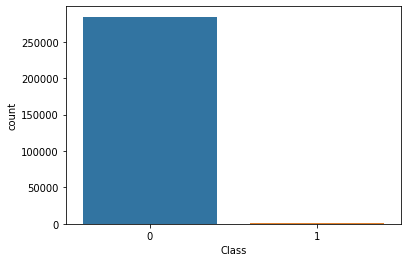

In [5]:
print(df.groupby('Class').size())
sb.countplot(data=df, x='Class');

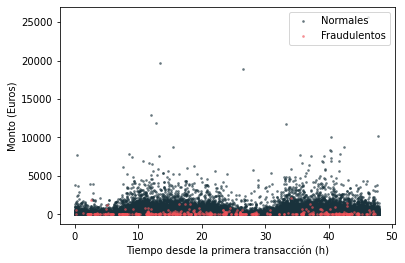

In [7]:
normales = df[df.Class==0]
fraudulentos = df[df.Class==1]
plt.scatter(normales.Time/3600, normales.Amount, 
    alpha = 0.5, c='#19323C', label='Normales', s=3)
plt.scatter(fraudulentos.Time/3600, fraudulentos.Amount, 
    alpha = 0.5, c='#F2545B', label='Fraudulentos', s=3)
plt.xlabel('Tiempo desde la primera transacción (h)')
plt.ylabel('Monto (Euros)')
plt.legend(loc='upper right')
plt.show()

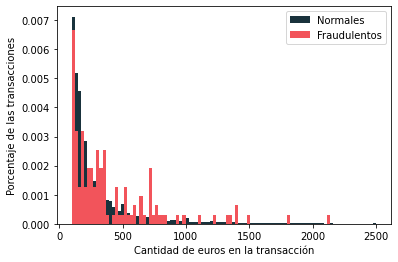

In [8]:
bins=np.linspace(100,2500, 100)
plt.hist(normales.Amount, bins, label='Normales', color='#19323C', density=True)
plt.hist(fraudulentos.Amount, bins, label='Fraudulentos', color='#F2545B', density=True)
plt.legend(loc='upper right')
plt.xlabel('Cantidad de euros en la transacción')
plt.ylabel('Porcentaje de las transacciones')
plt.show()

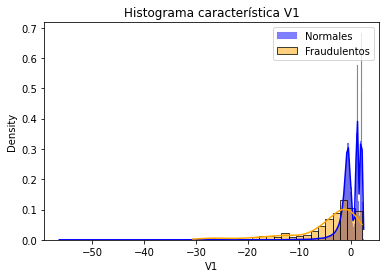

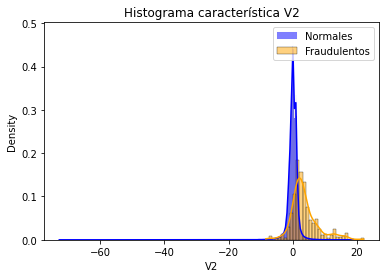

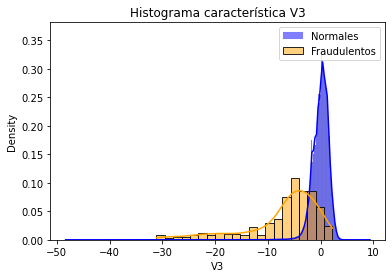

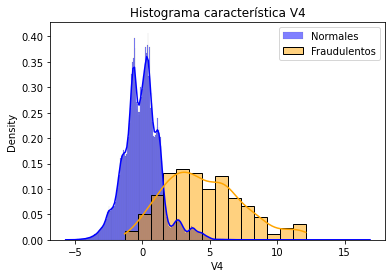

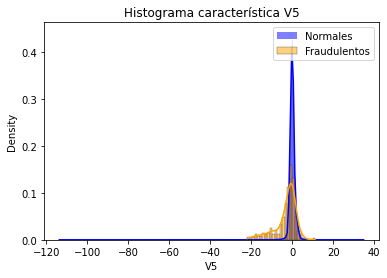

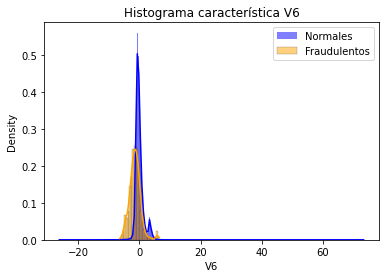

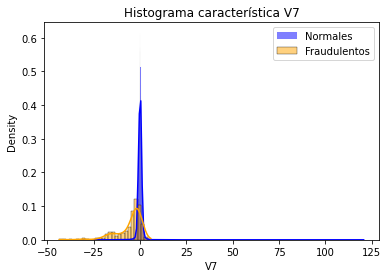

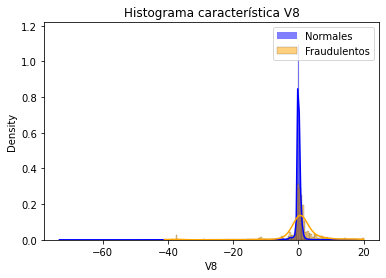

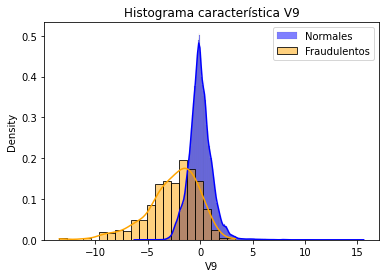

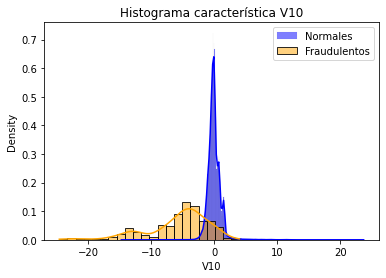

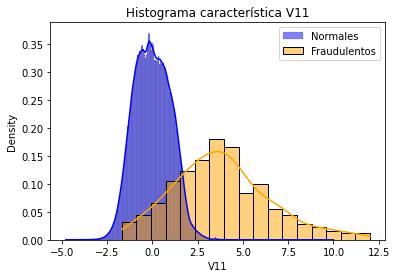

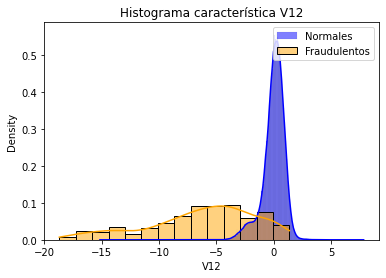

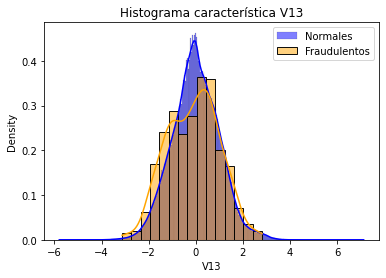

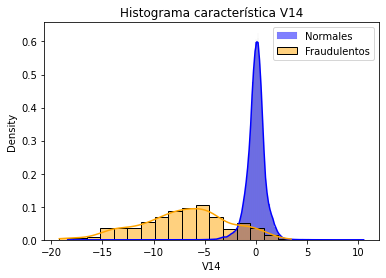

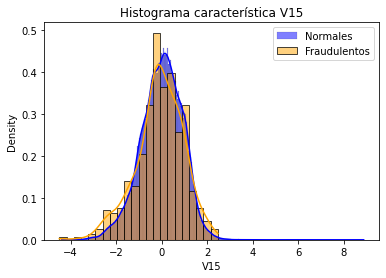

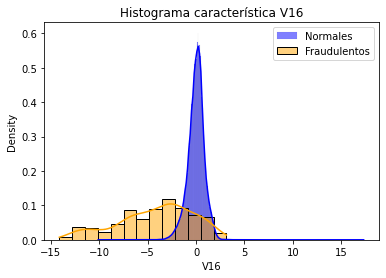

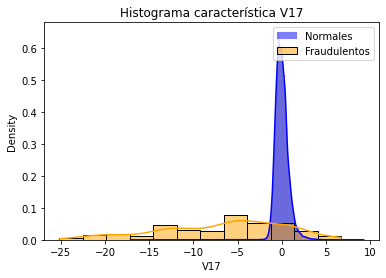

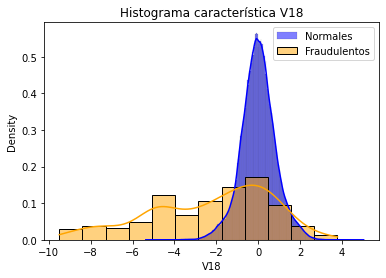

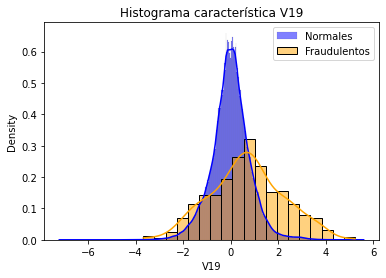

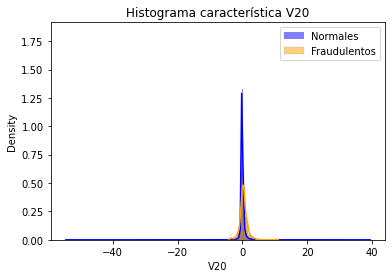

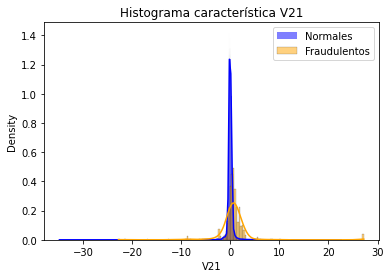

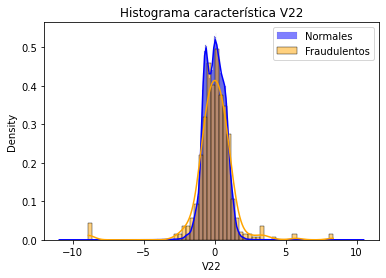

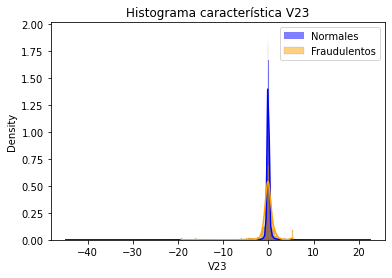

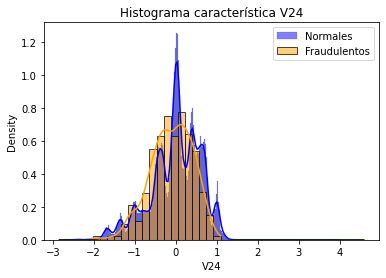

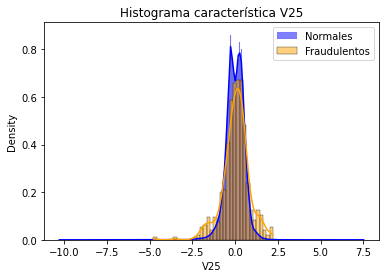

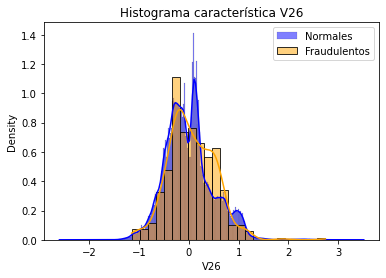

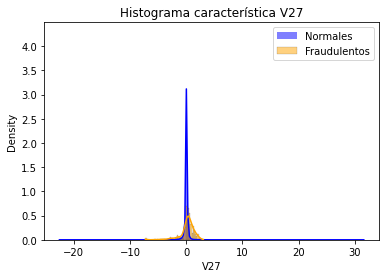

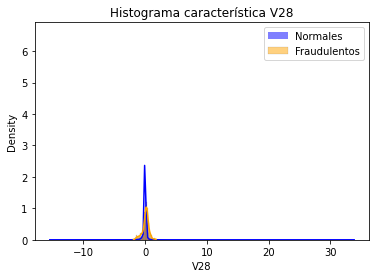

In [57]:
columns=df.iloc[:,1:-2].columns
for i in columns:
    sb.histplot(normales[i], label='Normales', kde=True, color='blue', stat='density')
    sb.histplot(fraudulentos[i], label='Fraudulentos', kde=True, color='orange',  stat='density')
    plt.title('Histograma característica '+i)
    plt.legend(loc='upper right')
    plt.show()

In [5]:
normales = df[df.Class==0]
fraudulentos = df[df.Class==1]
normales.drop(['Time'], axis=1, inplace=True)
fraudulentos.drop(['Time'], axis=1, inplace=True)
Xtrain, Xdummy=train_test_split(normales, test_size=0.2)
Xval, Xtest=train_test_split(Xdummy, test_size=0.5)
Xtest=pd.concat([Xtest, fraudulentos])

C:\Users\Trabajo\anaconda3\envs\tf-latest2\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [6]:
Xtrain = Xtrain.drop(['Class'], axis=1).values
Xval=Xval.drop(['Class'], axis=1).values
Ytest=Xtest['Class'].values
Xtest=Xtest.drop(['Class'], axis=1).values

In [7]:
scaler=StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
Xval=scaler.transform(Xval)
Xtest=scaler.transform(Xtest)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 29)]              0         
_________________________________________________________________
dense (Dense)                (None, 20)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 14)                294       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 29)                609       
Total params: 1,803
Trainable params: 1,803
Non-trainable params: 0
_________________________________________________________________


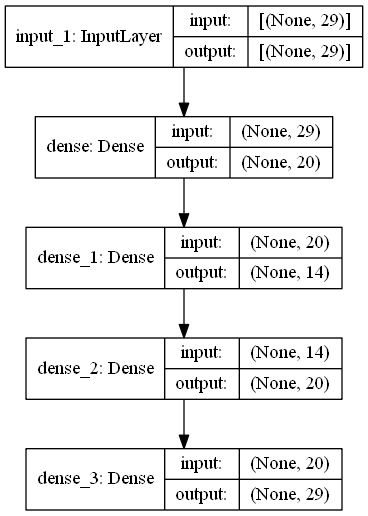

In [7]:
input_shape=Xtrain.shape[1]
input_layer=tf.keras.Input(shape=(input_shape,))
#Encoder
encoder=Dense(20, activation='tanh')(input_layer)
encoder=Dense(14, activation='relu')(encoder)
#Decoder
decoder=Dense(20, activation='tanh')(encoder)
decoder=Dense(input_shape, activation='relu')(decoder)
#autoencoder
autoencoder=Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()
tf.keras.utils.plot_model(autoencoder, show_shapes=True)

In [8]:
csv_logger1=CSVLogger('training_append_standard.csv', append=True)
csv_logger2=CSVLogger('training_no_append_standard.csv', append=False)

In [9]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(), loss='mse')

In [10]:
autoencoder.fit(Xtrain, Xtrain, epochs=100, batch_size=32, shuffle=True,
         validation_data=(Xval,Xval), verbose=1, callbacks=[csv_logger1,csv_logger2])

Epoch 1/100
7108/7108 [==============================] - 23s 3ms/step - loss: 0.6815 - val_loss: 0.6713
Epoch 2/100
7108/7108 [==============================] - 21s 3ms/step - loss: 0.6150 - val_loss: 0.6503
Epoch 3/100
7108/7108 [==============================] - 22s 3ms/step - loss: 0.6027 - val_loss: 0.6404
Epoch 4/100
7108/7108 [==============================] - 21s 3ms/step - loss: 0.5959 - val_loss: 0.6353
Epoch 5/100
7108/7108 [==============================] - 23s 3ms/step - loss: 0.5911 - val_loss: 0.6434
Epoch 6/100
7108/7108 [==============================] - 22s 3ms/step - loss: 0.5874 - val_loss: 0.6256
Epoch 7/100
7108/7108 [==============================] - 24s 3ms/step - loss: 0.5843 - val_loss: 0.6233
Epoch 8/100
7108/7108 [==============================] - 24s 3ms/step - loss: 0.5813 - val_loss: 0.6224
Epoch 9/100
7108/7108 [==============================] - 24s 3ms/step - loss: 0.5800 - val_loss: 0.6188
Epoch 10/100
7108/7108 [==============================] - 22s 3m

7108/7108 [==============================] - 22s 3ms/step - loss: 0.5616 - val_loss: 0.5981
Epoch 80/100
7108/7108 [==============================] - 23s 3ms/step - loss: 0.5616 - val_loss: 0.6013
Epoch 81/100
7108/7108 [==============================] - 24s 3ms/step - loss: 0.5613 - val_loss: 0.5982
Epoch 82/100
7108/7108 [==============================] - 22s 3ms/step - loss: 0.5614 - val_loss: 0.5996
Epoch 83/100
7108/7108 [==============================] - 24s 3ms/step - loss: 0.5612 - val_loss: 0.5982
Epoch 84/100
7108/7108 [==============================] - 22s 3ms/step - loss: 0.5608 - val_loss: 0.5986
Epoch 85/100
7108/7108 [==============================] - 21s 3ms/step - loss: 0.5613 - val_loss: 0.5976
Epoch 86/100
7108/7108 [==============================] - 22s 3ms/step - loss: 0.5610 - val_loss: 0.5981
Epoch 87/100
7108/7108 [==============================] - 22s 3ms/step - loss: 0.5612 - val_loss: 0.6000
Epoch 88/100
7108/7108 [==============================] - 21s 3ms/st

In [ ]:
autoencoder.save('model_standard_scaler.h5')

In [9]:
autoencoder = keras.models.load_model('model_standard_scaler.h5')

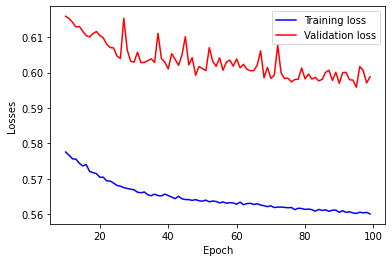

In [10]:
losses=pd.read_csv('training_append_standard.csv')
x=losses.epoch.values
y1=losses.loss.values
y2=losses.val_loss.values

plt.plot(x[10:], y1[10:], color='blue', label='Training loss')
plt.plot(x[10:], y2[10:], color='red', label='Validation loss')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.show()

In [11]:
Xpred=autoencoder.predict(Xtest)
mse=((Xtest-Xpred)**2).mean(axis=1)

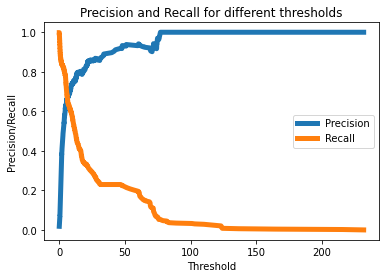

In [12]:
#Cálculo del umbral
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Ytest, mse)
plt.plot(thresholds, precision[1:], label="Precision",linewidth=5)
plt.plot(thresholds, recall[1:], label="Recall",linewidth=5)
plt.title('Precision and Recall for different thresholds')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [13]:
threshold=0.7
Ypred=[0 if e<threshold else 1 for e in mse]

In [14]:
from sklearn.metrics import confusion_matrix

conf_matrix_norm = confusion_matrix(Ytest, Ypred, normalize='true')
conf_matrix = confusion_matrix(Ytest, Ypred)
print(conf_matrix)

[[24219  4213]
 [   46   446]]


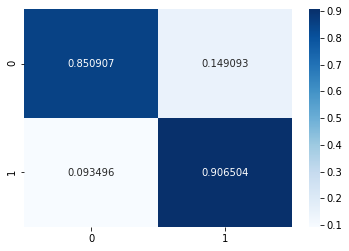

In [69]:
sb.heatmap(conf_matrix_norm, annot=True, fmt='f', cmap="Blues")
plt.show()

In [70]:
from sklearn.metrics import classification_report
clf_rep=classification_report(Ytest, Ypred)
print(clf_rep)

              precision    recall  f1-score   support

           0       1.00      0.85      0.92     28432
           1       0.10      0.91      0.17       492

    accuracy                           0.85     28924
   macro avg       0.55      0.88      0.55     28924
weighted avg       0.98      0.85      0.91     28924

